In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

In [4]:
# Use the iris database to answer the following quesitons:
iris = data('iris')
iris.shape

(150, 5)

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


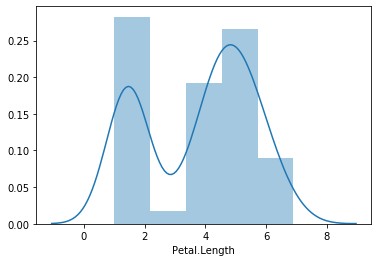

In [8]:
# 1. What does the distribution of petal lengths look like?
sns.distplot(iris['Petal.Length'])

Text(0.5, 0.98, 'Petal Width vs. Petal Length by Species')

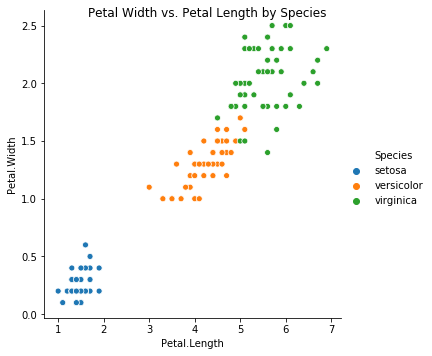

In [18]:
# 2. Is there a correlation between petal length and petal width?
sns.relplot(x='Petal.Length', y='Petal.Width', data=iris, hue='Species')
plt.suptitle('Petal Width vs. Petal Length by Species')

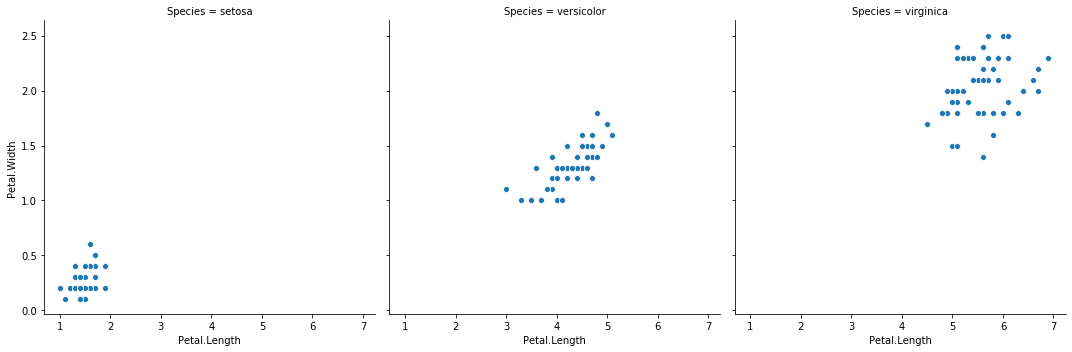

In [20]:
#3. Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(x='Petal.Length', y='Petal.Width', data=iris, col='Species')

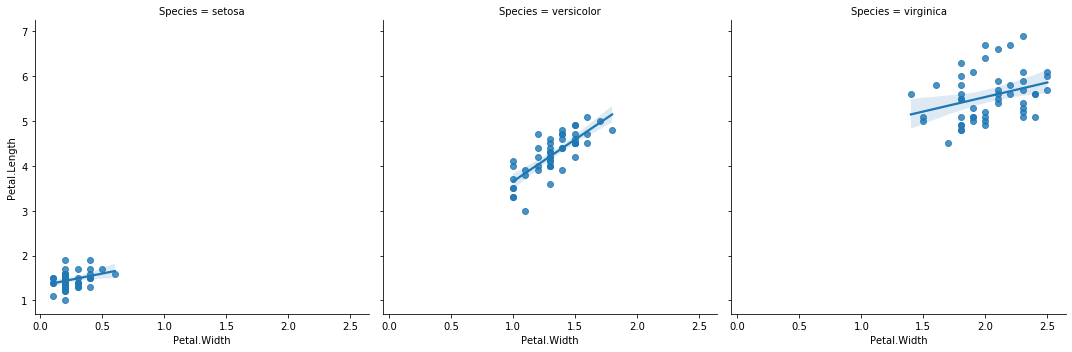

In [34]:
# 4. Which features would be best used to predict species?
sns.lmplot(x='Petal.Width', y='Petal.Length', col='Species', data=iris)

###### Part 2

In [39]:
# 1. Using the lesson as an example, use seaborn's `load_dataset` function to load the 'anscombe' data set. 
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [43]:
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [40]:
# What do you notice?
# Counts are the same for x and y
# mean is the similar across x and y
# std is similar acorss x and y

In [ ]:
#Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

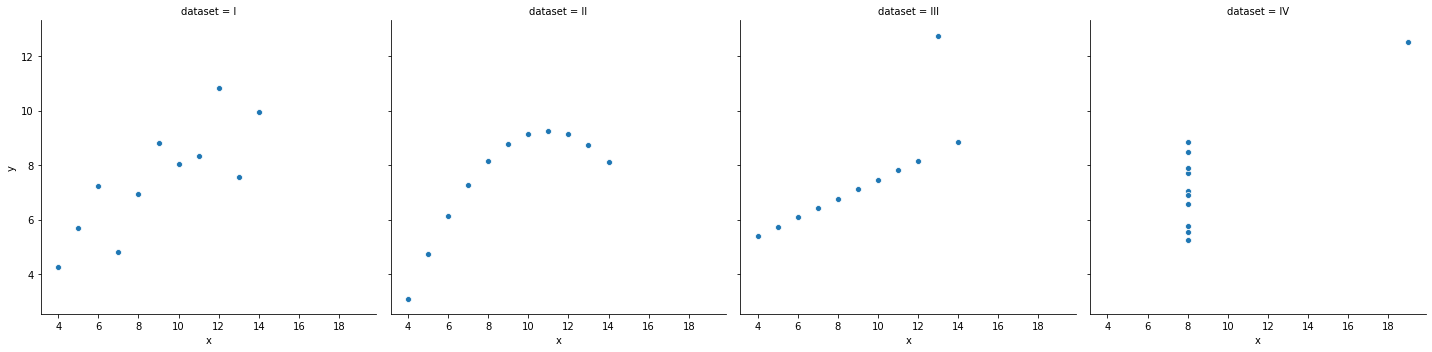

In [45]:
sns.relplot(x='x', y='y', data=anscombe, col='dataset')

In [50]:
# 2. Load the `InsectSprays` dataset and read it's documentation. 
data('InsectSprays', show_doc=True)
insect_sprays = data('InsectSprays')
insect_sprays.head()

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


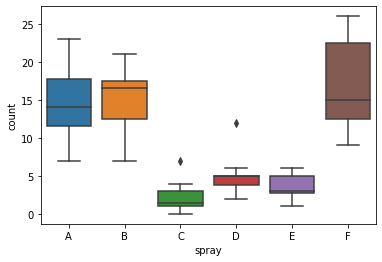

In [52]:
# Create a boxplot that shows the effectiveness of the different insect sprays.
sns.boxplot(data=insect_sprays, x='spray', y='count')

In [80]:
# 3. Load the `swiss` dataset and read it's documentation. 
data('swiss', show_doc=True)
swiss = data('swiss')

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [81]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


Create visualizations to answer the following questions:

In [107]:
## Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
## (Choose a cutoff point for what constitutes catholic)
swiss['is_catholic'] = swiss.Catholic > 50
#swiss[['Catholic', 'is_catholic']].sort_values(by='Catholic')

In [108]:
swiss_index = swiss.reset_index()
swiss_index.rename(columns={'index':'province'}, inplace=True)

In [ ]:
## Does whether or not a province is Catholic influence fertility?

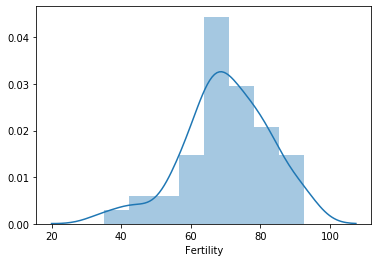

In [115]:
sns.distplot(swiss.Fertility)

In [ ]:
## What measure correlates most strongly with fertility?